In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-muted')

In [2]:
#read in kaggle dataset on 2018 flights in the US
df = pd.read_csv('Data/Combined_Flights_2018.csv')

In [3]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [5]:
#filter down to relevant columns
subset_cols = [
    'FlightDate', 
    'Airline', 
    'Flight_Number_Marketing_Airline',
    'Origin', 
    'Dest', 
    'Cancelled',
    'Diverted',
    'CRSDepTime',
    'CRSArrTime',
    'DepTime',
    'DepDelayMinutes',
    'OriginAirportID',
    'OriginCityName',
    'OriginStateName',
    'DestAirportID',
    'DestCityName',
    'DestStateName',
    'TaxiOut',
    'TaxiIn',
    'ArrTime',
    'ArrDelayMinutes'
]
df = df[subset_cols]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Flight_Number_Marketing_Airline  int64  
 3   Origin                           object 
 4   Dest                             object 
 5   Cancelled                        bool   
 6   Diverted                         bool   
 7   CRSDepTime                       int64  
 8   CRSArrTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOut 

In [7]:
df['Origin'].nunique()

370

In [8]:
#is it common for flights to be diverted?
df['Diverted'].mean()

0.0024527586900247333

<AxesSubplot:title={'center':'Distribution of Flight Delays'}, ylabel='Frequency'>

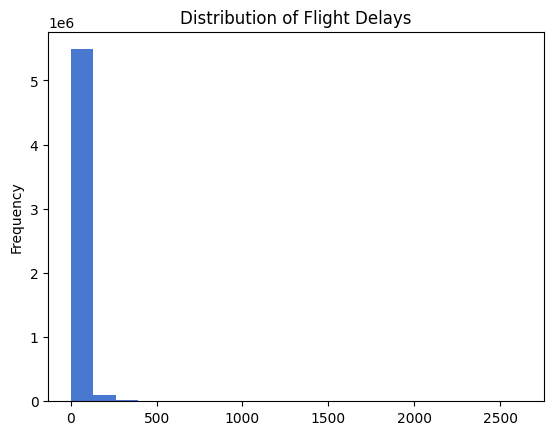

In [9]:
#analyze 'DepDelayMinutes' Variable
df['DepDelayMinutes'].plot(kind = 'hist', bins = 20, title = 'Distribution of Flight Delays')
#very skewed to the right, also note the flights arriving early will not show a "negative" delay

<AxesSubplot:title={'center':'Distribution of Flight Delays Less Than An Hour'}, ylabel='Frequency'>

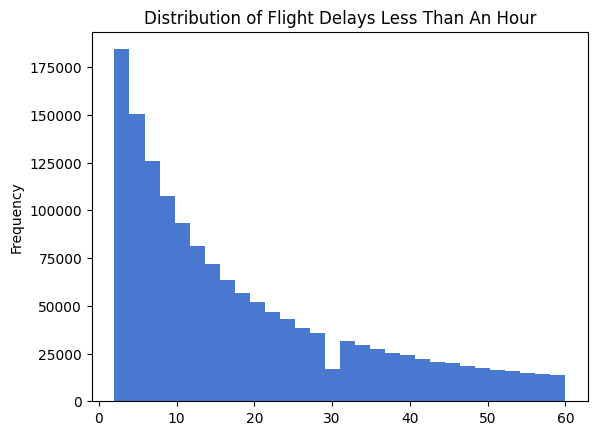

In [10]:
#look at delays less than an hour, excluding on time flights
df.query('DepDelayMinutes > 1 and DepDelayMinutes < 61')['DepDelayMinutes'].plot(kind = 'hist', bins = 30, title = 'Distribution of Flight Delays Less Than An Hour')

In [11]:
df[['CRSDepTime', 'DepTime']]

,CRSDepTime,DepTime
0,1202,1157.0
1,1202,1157.0
2,1202,1153.0
3,1202,1150.0
4,1400,1355.0
...,...,...
5689507,1445,1433.0
5689508,1235,1224.0
5689509,1030,1016.0
5689510,1410,1403.0


In [12]:
#Grouping of delays
#3 categories: on time/small delay (0-15 min), medium delay (15-45 min), large delay(45+ min)
df['DepDelayMinutes'] 

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
5689507    0.0
5689508    0.0
5689509    0.0
5689510    0.0
5689511    0.0
Name: DepDelayMinutes, Length: 5689512, dtype: float64

In [13]:
df['DelayGroup'] = None
df.loc[df['DepDelayMinutes'] == 0, 'DelayGroup'] = 'OnTime_Early'
df.loc[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] <= 15), 'DelayGroup'] = 'Small_Delay'
df.loc[(df['DepDelayMinutes'] > 15) & (df['DepDelayMinutes'] <= 45), 'DelayGroup'] = 'Medium_Delay'
df.loc[df['DepDelayMinutes'] > 45, 'DelayGroup'] = 'Large_Delay'
df.loc[df['Cancelled'], 'DelayGroup'] = 'Cancelled'

In [14]:
df['DelayGroup'].isna().sum()

1113

In [15]:
df.loc[df['DelayGroup'].isna()][['CRSDepTime', 'DepTime']].diff(axis = 1)['DepTime'].value_counts()

 0.0       1109
 30.0         1
 51.0         1
-1792.0       1
 8.0          1
Name: DepTime, dtype: int64

<AxesSubplot:title={'center':'2018 Flight Performance'}>

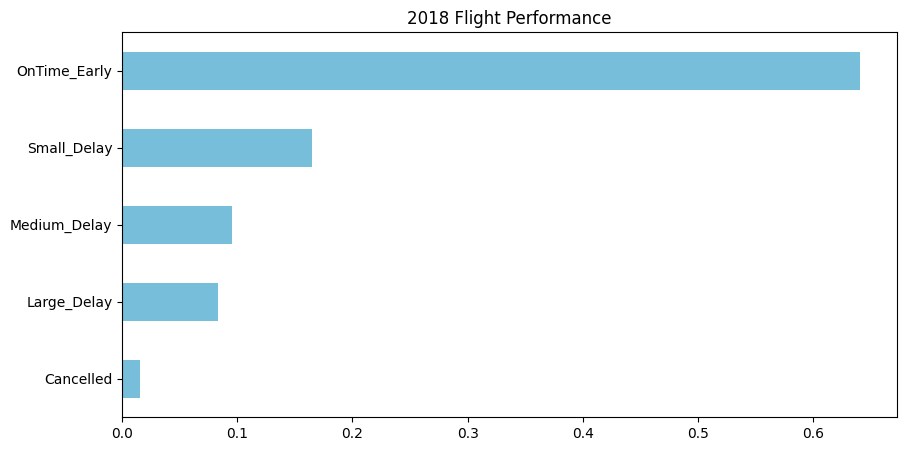

In [29]:
pal = sns.color_palette()
df['DelayGroup'].value_counts(normalize = True, ascending = True).plot(kind = 'barh', 
                                                     figsize = (10, 5), 
                                                     color = pal[5], 
                                                     title = '2018 Flight Performance')

In [37]:
#results by month
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Month'] = df['FlightDate'].dt.month
df_agg = df.groupby('Month')['DelayGroup'].value_counts(normalize = True).unstack() * 100
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
df_agg[col_order].style.background_gradient(cmap = 'Blues')
#lots of cancellations during the beginning of the year, possibly weather related
#delays in the middle of the year due to lots of people going on vacation

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,65.026312,15.167608,9.050127,7.980350,2.775603
2,60.529643,18.386080,11.059473,8.104287,1.920516
3,62.037893,18.237551,10.091526,7.050489,2.582541
4,65.784553,16.446086,9.217935,7.560888,0.990538
5,60.495538,17.976883,10.683228,9.601650,1.242701
6,57.143442,19.164587,11.534382,10.802270,1.355320
7,58.509068,18.068733,11.068842,10.660912,1.692446
8,59.223289,16.496463,10.389964,11.573218,2.317066
9,70.249555,13.513191,7.620755,7.126098,1.490400


Text(0.5, 0, 'Flights (Million)')

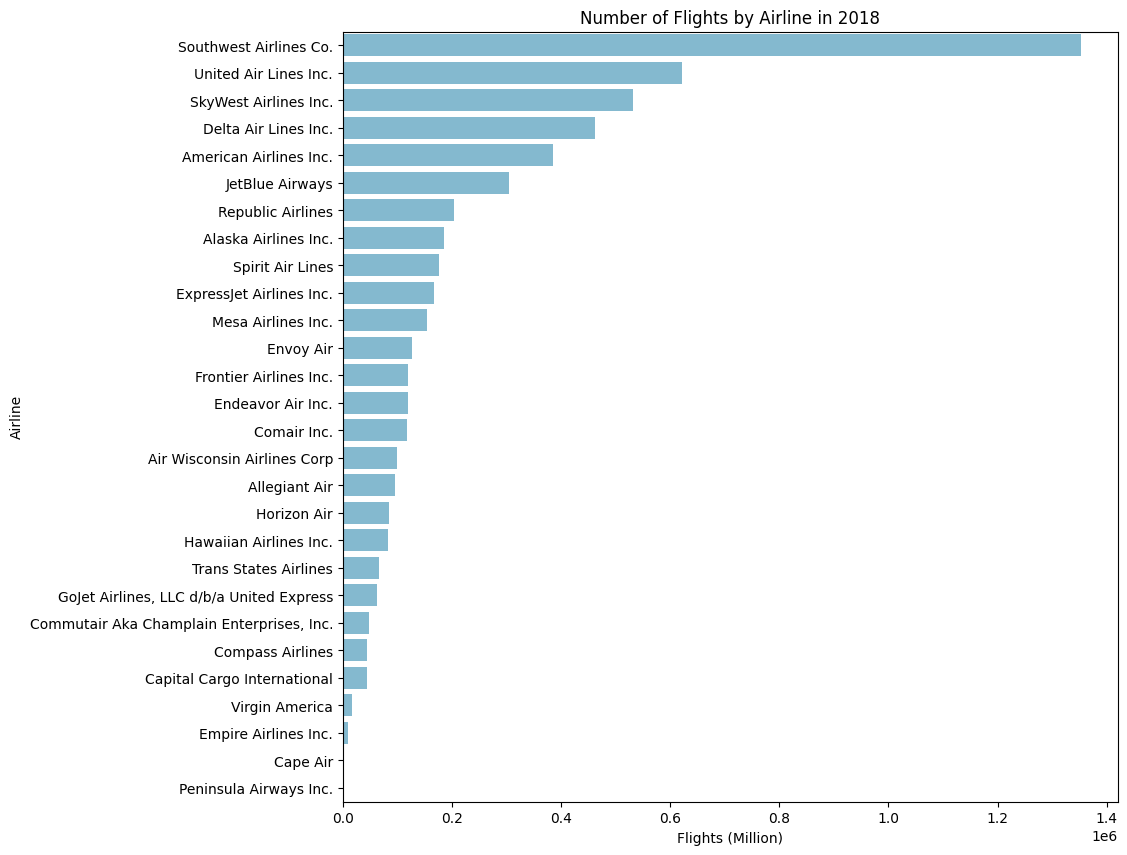

In [47]:
airlines_ordered = df['Airline'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(y = df['Airline'], 
              color = pal[5], 
              order = airlines_ordered)
ax.set_title('Number of Flights by Airline in 2018')
ax.set_xlabel('Flights (Million)')

In [54]:
top_airlines = (df['Airline'].value_counts().reset_index().query('Airline > 100_000')['index'].values.tolist())

In [55]:
top_airlines

['Southwest Airlines Co.',
 'United Air Lines Inc.',
 'SkyWest Airlines Inc.',
 'Delta Air Lines Inc.',
 'American Airlines Inc.',
 'JetBlue Airways',
 'Republic Airlines',
 'Alaska Airlines Inc.',
 'Spirit Air Lines',
 'ExpressJet Airlines Inc.',
 'Mesa Airlines Inc.',
 'Envoy Air',
 'Frontier Airlines Inc.',
 'Endeavor Air Inc.',
 'Comair Inc.']

In [58]:
df.loc[df['Airline'].isin(top_airlines)]

,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSArrTime,DepTime,...,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,ArrTime,ArrDelayMinutes,DelayGroup,Month
0,2018-01-23,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1304,1157.0,...,Georgia,10397,"Atlanta, GA",Georgia,14.0,7.0,1256.0,0.0,OnTime_Early,1
1,2018-01-24,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1304,1157.0,...,Georgia,10397,"Atlanta, GA",Georgia,13.0,12.0,1258.0,0.0,OnTime_Early,1
2,2018-01-25,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1304,1153.0,...,Georgia,10397,"Atlanta, GA",Georgia,18.0,11.0,1302.0,0.0,OnTime_Early,1
3,2018-01-26,Endeavor Air Inc.,3298,ABY,ATL,False,False,1202,1304,1150.0,...,Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1253.0,0.0,OnTime_Early,1
4,2018-01-27,Endeavor Air Inc.,3298,ABY,ATL,False,False,1400,1500,1355.0,...,Georgia,10397,"Atlanta, GA",Georgia,17.0,11.0,1459.0,0.0,OnTime_Early,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688714,2018-09-15,United Air Lines Inc.,1878,EWR,SFO,False,False,1022,1328,1019.0,...,New Jersey,14771,"San Francisco, CA",California,23.0,17.0,1329.0,1.0,OnTime_Early,9
5688715,2018-09-15,United Air Lines Inc.,1878,SFO,IAH,False,False,1605,2159,1600.0,...,California,12266,"Houston, TX",Texas,25.0,6.0,2143.0,0.0,OnTime_Early,9
5688716,2018-09-15,United Air Lines Inc.,1877,TPA,EWR,False,False,727,959,715.0,...,Florida,11618,"Newark, NJ",New Jersey,9.0,4.0,950.0,0.0,OnTime_Early,9
5688717,2018-09-15,United Air Lines Inc.,1875,SFO,PDX,False,False,907,1057,900.0,...,California,14057,"Portland, OR",Oregon,27.0,5.0,1051.0,0.0,OnTime_Early,9


In [59]:
df_top = df.loc[df['Airline'].isin(top_airlines)].reset_index(drop = True).copy()

In [62]:
df_top.groupby(['Airline', 'DelayGroup']).size().unstack()

DelayGroup,Cancelled,Large_Delay,Medium_Delay,OnTime_Early,Small_Delay
Airline,,,,,
Alaska Airlines Inc.,1603,8755,13363,135195,25835
American Airlines Inc.,5431,31386,35457,245375,67534
Comair Inc.,3597,9528,9851,75449,18707
Delta Air Lines Inc.,2151,21625,34123,330808,73011
Endeavor Air Inc.,2224,10594,8764,85967,11372
Envoy Air,3947,8970,10500,89339,14994
ExpressJet Airlines Inc.,4691,17022,11972,118926,14569
Frontier Airlines Inc.,2328,17885,15740,64411,19667
JetBlue Airways,6419,40179,37771,173690,46951


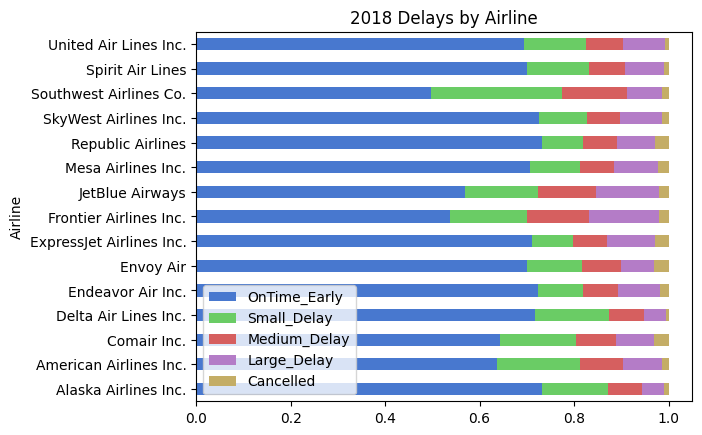

In [69]:
col_order = ['OnTime_Early', 'Small_Delay', 'Medium_Delay', 'Large_Delay', 'Cancelled']
df_top.groupby(['Airline'])['DelayGroup'].value_counts(normalize = True).unstack()[col_order].plot(
    kind = 'barh', stacked = True, title = '2018 Delays by Airline').legend(loc ='lower left')